<a href="https://colab.research.google.com/github/harsh-agar/E-Net/blob/master/iNNvestigate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x
import os
import cv2
from tqdm import tqdm_notebook
import scipy.io as io

TensorFlow 1.x selected.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!wget -P '/content/drive/MyDrive/iNNvestigate' -c "https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz"
!ls '/content/drive/MyDrive/iNNvestigate/'
!tar -xvzf 'r/content/drive/MyDrive/iNNvestigate/102flowers.tgz' -C '/content/drive/MyDrive/iNNvestigate'

--2021-01-10 15:13:06--  https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

102flowers.tgz	dataset  imagelabels.mat  innvestigate	jpg  models
tar (child): r/content/drive/MyDrive/iNNvestigate/102flowers.tgz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now


In [ ]:
!ls /content/drive/MyDrive/iNNvestigate

102flowers.tgz	dataset  imagelabels.mat  jpg


In [ ]:
label_mat = io.loadmat('/content/drive/MyDrive/iNNvestigate/imagelabels.mat')
len(label_mat['labels'][0])

8189

In [ ]:
img_names = os.listdir('/content/drive/MyDrive/iNNvestigate/jpg/')
img_names.sort()
path = '/content/drive/MyDrive/iNNvestigate/dataset/'
for i in tqdm_notebook(range(len(label_mat['labels'][0]))):
  img = cv2.imread('/content/drive/MyDrive/iNNvestigate/jpg/'+img_names[i])
  if i%5==0:
    folder_path = path+'val/'+str(label_mat['labels'][0][i])
  elif i%5==1:
    folder_path = path+'test/'+str(label_mat['labels'][0][i])
  else:
    folder_path = path+'train/'+str(label_mat['labels'][0][i])
  if not os.path.exists(folder_path):
    os.makedirs(folder_path)
  cv2.imwrite(folder_path+'/'+img_names[i], img) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [3]:
# from keras.applications import VGG16
# from keras import Model
# from keras.layers import Input, Flatten, Dense
# import innvestigate

# vgg = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
# lname = "block5_conv2"
# last_vgg_layer = vgg.get_layer(lname)
# vgg_partial = Model(inputs=vgg.input, outputs=last_vgg_layer.output, name="Partial_VGG16_" + lname)
# vgg_partial.trainable = False

# inputs = Input(shape=(128, 128, 3))
# # x = vgg_partial(inputs)
# # x = Flatten()(x)
# x = Flatten()(last_vgg_layer.get_output_at(0))

# x = Dense(16, activation='relu')(x)
# x = Dense(1, activation=None)(x)

# model = Model(inputs=inputs, outputs=x)
# print(model.summary())

from keras.applications.vgg16 import VGG16 as PTModel
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, Input, Conv2D, multiply, LocallyConnected2D, Lambda
from keras.models import Model

in_lay = Input(shape=(224, 224, 3))
base_pretrained_model = PTModel(input_shape = (224, 224, 3), 
                                include_top = True, 
                                weights = None,
                                classes=102)

model = base_pretrained_model
model.summary()

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_____________________________________________

In [8]:
# from keras.applications import VGG16
# from keras import Model
# from keras.layers import Input, Flatten, Dense

# image_size=224

# vgg = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
# lname = "block5_conv2"
# last_vgg_layer = vgg.get_layer(lname)
# vgg_partial = Model(inputs=vgg.input, outputs=last_vgg_layer.output, name="Partial_VGG16_" + lname)
# vgg_partial.trainable = False

# last_vgg_layer.get_output_at(0)
# # inputs = Input(shape=(image_size, image_size, 3))
# # x = Flatten()(last_vgg_layer.get_output_at(0))
# # x = Dense(16, activation='relu')(x)
# # x = Dense(1, activation=None)(x)

# # model = Model(inputs=inputs, outputs=x)
# # model.summary()

In [9]:
# from keras.applications import VGG16
# from keras import Model
# from keras import Sequential
# from keras.layers import Input, Flatten, Dense

# image_size=224

# vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
# lname = "block5_conv2"
# last_vgg_layer = vgg_conv.get_layer(lname)

# for layer in vgg_conv.layers[:]:
#   layer.trainable = False
# for layer in vgg_conv.layers:
#   print(layer, layer.trainable)

# model = Sequential()

# # Add the vgg convolutional base model
# # model.add(vgg_conv)
# model.add(last_vgg_layer.get_output_at(0))

# # Add new layers
# model.add(Flatten())

# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(102, activation='softmax'))

# # Show a summary of the model. Check the number of trainable parameters
# model.summary()

In [12]:
# from keras.applications import VGG16
# from keras import Sequential
# from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout
# from keras.preprocessing.image import ImageDataGenerator
# import numpy as np

# image_size=224

# vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# for layer in vgg_conv.layers[:]:
#   layer.trainable = False
# for layer in vgg_conv.layers:
#   print(layer, layer.trainable)

# lname = "block5_conv2"
# last_vgg_layer = vgg_conv.get_layer(lname)

# # Create the model
# model = Sequential()

# # Add the vgg convolutional base model
# # model.add(vgg_conv)
# model.add(last_vgg_layer.get_output_at(0))

# # Add new layers
# model.add(Flatten())

# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(102, activation='softmax'))

# # Show a summary of the model. Check the number of trainable parameters
# model.summary()

In [4]:
from keras.optimizers import RMSprop
# # Configure the model for training
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['categorical_accuracy'])

In [5]:
from keras.preprocessing.image import ImageDataGenerator

# Load the normalized images
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Change the batchsize according to your system RAM
train_batchsize = 64
val_batchsize = 64

train_dir = '/content/drive/MyDrive/iNNvestigate/dataset/train'
val_dir = '/content/drive/MyDrive/iNNvestigate/dataset/val'

image_size = 224

# Data generator for training data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')

# Data generator for validation data
validation_generator = validation_datagen.flow_from_directory(
        val_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 4913 images belonging to 102 classes.
Found 1638 images belonging to 102 classes.


In [6]:
train_generator.samples/train_generator.batch_size

76.765625

In [7]:
import os
import keras
fd = os.open(os.devnull, os.O_RDWR)
# NB: even if stdin is closed, fd >= 0
os.dup2(fd, 1)
os.dup2(fd, 2)
if fd > 2:
    os.close(fd)

callbacks = [
        # saving model weights at checkpoints
        keras.callbacks.ModelCheckpoint(
            filepath          = os.path.join('/content/drive/MyDrive/iNNvestigate/models/','otcmodel_{epoch}.h5'),
            save_best_only    = True,
            monitor           = 'val_loss',
            save_weights_only = True,
            verbose           = 1
        )]

# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=
         train_generator.samples/train_generator.batch_size,
      epochs=20,
      validation_data=validation_generator, 
      validation_steps=
         validation_generator.samples/validation_generator.batch_size,
      verbose=1,
      callbacks=callbacks,
)



Epoch 1/20
76/76 [============================>.] - ETA: 0s - loss: 4.6181 - categorical_accuracy: 0.0322

/tensorflow-1.15.2/python3.6/keras/utils/data_utils.py:616: UserWarning: The input 18 could not be retrieved. It could be because a worker has died.
  UserWarning)
/tensorflow-1.15.2/python3.6/keras/utils/data_utils.py:616: UserWarning: The input 19 could not be retrieved. It could be because a worker has died.
  UserWarning)
/tensorflow-1.15.2/python3.6/keras/utils/data_utils.py:616: UserWarning: The input 20 could not be retrieved. It could be because a worker has died.
  UserWarning)
/tensorflow-1.15.2/python3.6/keras/utils/data_utils.py:616: UserWarning: The input 21 could not be retrieved. It could be because a worker has died.
  UserWarning)
/tensorflow-1.15.2/python3.6/keras/utils/data_utils.py:616: UserWarning: The input 22 could not be retrieved. It could be because a worker has died.
  UserWarning)
/tensorflow-1.15.2/python3.6/keras/utils/data_utils.py:616: UserWarning: The input 23 could not be retrieved. It could be because a worker has died.
  UserWarning)
/tensorflow-1.15

77/76 [==============================] - 418s 5s/step - loss: 4.6176 - categorical_accuracy: 0.0322 - val_loss: 4.6886 - val_categorical_accuracy: 0.0220

Epoch 00001: val_loss improved from inf to 4.68864, saving model to /content/drive/MyDrive/iNNvestigate/models/otcmodel_1.h5
Epoch 2/20
77/76 [==============================] - 57s 743ms/step - loss: 4.5383 - categorical_accuracy: 0.0283 - val_loss: 4.6192 - val_categorical_accuracy: 0.0311

Epoch 00002: val_loss improved from 4.68864 to 4.61920, saving model to /content/drive/MyDrive/iNNvestigate/models/otcmodel_2.h5
Epoch 3/20
77/76 [==============================] - 58s 752ms/step - loss: 4.4356 - categorical_accuracy: 0.0434 - val_loss: 4.3355 - val_categorical_accuracy: 0.0446

Epoch 00003: val_loss improved from 4.61920 to 4.33551, saving model to /content/drive/MyDrive/iNNvestigate/models/otcmodel_3.h5
Epoch 4/20
77/76 [==============================] - 57s 742ms/step - loss: 4.0678 - categorical_accuracy: 0.0643 - val_loss: 4

In [11]:
# pip install --upgrade pillow

In [8]:
all_ckpts = [file for file in os.listdir('/content/drive/MyDrive/iNNvestigate/models/') if ('_' in file) and ('.h5' in file)]
ckpt_epochs = sorted(
    [int(s) for ckpt_name in all_ckpts for s in ckpt_name.replace('_', '.').split('.') if s.isdigit()])
ckpt_epoch = ckpt_epochs[-1]
epoch = ckpt_epoch

print('evaluating epoch %d' % ckpt_epoch)
ckpt = [ckpt for ckpt in all_ckpts if str(ckpt_epoch) in ckpt]
ckpt = ckpt[0]  # maybe otcmodel_5, otcmodel_50, otcmodel_51, ... in ckpt, if epoch = 5
model.load_weights(os.path.join('/content/drive/MyDrive/iNNvestigate/models/', ckpt))

evaluating epoch 10


In [9]:
import os
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 1.x
    IS_COLAB = True
    if not os.path.exists('/content/drive/MyDrive/iNNvestigate/innvestigate'):
        !git clone https://github.com/albermax/innvestigate.git /content/drive/MyDrive/iNNvestigate/innvestigate
    !pip install /content/drive/MyDrive/iNNvestigate/innvestigate --no-deps
    %cd /content/drive/MyDrive/iNNvestigate/innvestigate/innvestigate
except Exception:
    IS_COLAB = False

Processing ./drive/MyDrive/iNNvestigate/innvestigate
  Created wheel for innvestigate: filename=innvestigate-1.0.9-cp36-none-any.whl size=99902 sha256=bfd0c4ebca1c3f7bf5d5a719b0cfcd2748821fbbb0695c41cc6fe94ff938c016
  Stored in directory: /tmp/pip-ephem-wheel-cache-_rgasgdz/wheels/ed/6a/81/273f7c945338bda571202a81a08fd5224b3faa94490ba35401
Successfully built innvestigate
/content/drive/MyDrive/iNNvestigate/innvestigate/innvestigate


In [9]:
!ls

analyzer  applications	__init__.py  layers.py	tests  tools  utils


In [10]:
# !pip install keras==2.3.1
import innvestigate
import innvestigate.utils as iutils
innvestigate.__version__

'1.0.9'

In [14]:
import matplotlib.pyplot as plot
x= validation_generator.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


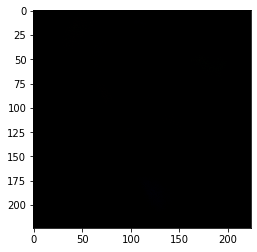

In [15]:
image = x[0][0:1]

# Stripping the softmax activation from the model
model_wo_sm = iutils.keras.graph.model_wo_softmax(model)

# Creating an analyzer
gradient_analyzer = innvestigate.analyzer.Gradient(model_wo_sm)

# Applying the analyzer
analysis = gradient_analyzer.analyze(image)

# Displaying the gradient
plot.imshow(analysis.squeeze(), cmap='seismic', interpolation='nearest')
plot.show()

In [14]:
import tensorflow
import keras as keras_standalone
import tensorflow.keras as keras_tf
print("keras_standalone:", keras_standalone.__version__, " keras_tf:", keras_tf.__version__, " tf:", tensorflow.__version__)

keras_standalone: 2.3.1  keras_tf: 2.2.4-tf  tf: 1.15.2
